In [2]:
# imports
import numpy as np
import numpy.random as rd
import numpy.linalg as linalg
import math
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [3]:
# helper functions
def sample(prob): # BS can be done
    r = rd.random();i = 0
    while r > prob[i]:
        r-=prob[i]
        i+=1
    return i

def bernoulli(prob):
    if rd.random() > prob:
        return 1.0
    return 0.0

def row_normalize(arr):
    arr = np.array(arr,float)
    for i in range(np.shape(arr)[0]):
        arr[i] = arr[i]/np.sum(arr[i])
    return arr

def normalize(arr):
    arr = np.array(arr,float)
    return arr/np.sum(arr)

def dot(x,y):
    return np.sum(np.multiply(x,y))

def steady_state_prob(matrix):
    """
    This function calculates relative throughput from a probability matrix
    :param matrix: the probability matrix
    :return: A list of relative throughput values
    """
    a_list = []
    b_list = []
    for v in matrix:
        a_list.append(1)
        b_list.append(0)
    b_list.append(1)
    A = np.append(np.transpose(matrix) - np.identity(len(matrix)), [a_list], axis=0)
    b = np.transpose(np.array(b_list))
    return np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

In [4]:
# examples

In [31]:
en = 3
ch = 3
P = np.array([.2,.4,.4])
E = np.array([[.5,.6,.4],[.2,.3,.1],[.4,.5,.3]])
# E = np.array([[.6,.9,.3],[.3,.5,.1],[.4,.1,.05]])
R = np.array([8.,6.,4.])
tol = .3
# print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[0.2 0.4 0.4]
[8. 6. 4.]
0.2


In [19]:
en = 5
ch = 4
P = np.array([.3,.1,.2,.4])
# P = np.array([[.35,.15,.05,.45],[.3,.3,.2,.2],[.3,.4,.1,.2],[.2,.15,.25,.4]])
# P = steady_state_prob(P)
E = np.array([[.4,.6,.4,.3],[.3,.4,.4,.3],[.3,.2,.1,.4],[.1,.35,.3,.4],[.2,.4,.1,.3]])
R = np.array([7.,5.5,4.,6.,5.])
tol = .35
# print(P)
# print(E)
print(R)

[0.15  0.05  0.075 0.175 0.1   0.05  0.125 0.1   0.05  0.125]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2   0.2   0.15 ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2   0.2   0.125]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15  0.175 0.275]
 [0.225 0.25  0.2   0.275 0.35  0.225 0.275 0.175 0.175 0.275]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05  0.05  0.15 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05  0.125 0.2  ]
 [0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2   0.05  0.15 ]
 [0.275 0.225 0.225 0.15  0.15  0.175 0.125 0.2   0.2   0.05 ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15  0.1   0.2  ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.2   0.175 0.2   0.3  ]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05  0.2   0.125]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05  0.15  0.2  ]]
[4.  3.5 4.  8.  2.  3.  4.  3.5 4.  6.  2.  3. ]
0.13


In [ ]:
en = 6
ch = 8
P = np.array([.3,.1,.2,.4,.3,.1,.3,.3])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4],[.3,.4,.4,.3,.3,.35,.25,.4],[.3,.2,.1,.4,.3,.4,.4,.3],[.4,.3,.3,.5,.6,.4,.55,.35],[.2,.4,.1,.3,.4,.4,.3,.1],[.4,.6,.4,.3,.6,.4,.3,.1]])/2
R = np.array([4.,3.5,4.,8.,2.,3.])
tol = .2
print(P)
print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

In [5]:
en = 12
ch = 10
P = np.array([.3,.1,.15,.35,.2,.1,.25,.2,.1,.25])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4,.4,.3],[.3,.4,.4,.3,.3,.35,.25,.4,.4,.25],[.3,.2,.1,.4,.3,.4,.4,.3,.35,.55],[.45,.5,.4,.55,.7,.45,.55,.35,.35,.55],[.2,.4,.1,.3,.4,.4,.3,.1,.1,.3],[.4,.6,.4,.3,.6,.4,.3,.1,.25,.4],[.4,.6,.4,.3,.1,.35,.3,.4,.1,.3],[.55,.45,.45,.3,.3,.35,.25,.4,.4,.1],[.3,.2,.1,.4,.3,.4,.4,.3,.2,.4],[.4,.3,.3,.5,.6,.4,.4,.35,.4,.6],[.2,.4,.1,.3,.4,.4,.3,.1,.4,.25],[.4,.6,.4,.3,.6,.4,.3,.1,.3,.4]])/2
R = np.array([4.,3.5,4.,8,2.,3.,4.,3.5,4.,6.,2.,3.])
tol = .2
# print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[4.  3.5 4.  8.  2.  3.  4.  3.5 4.  6.  2.  3. ]
0.13


In [ ]:
# random example generator
en = 15
ch = 20
P = normalize(rd.rand(ch))
E = rd.rand(en,ch)/2
R = np.array(rd.randint(low=1,high=2*en,size=en),float)
# print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

In [6]:
# getting optimal x using P
tol = .2
ltemp = linprog(c = -1*R, A_ub = [ub], b_ub = [tol],A_eq = np.ones((1,en)),b_eq = [1.0],method='simplex')
print(tol)
print(dot(ltemp.x,R), np.sum(ltemp.x),ltemp.con, ltemp.success, dot(ltemp.x,ub))
org_x = ltemp.x
print(ltemp.x)

0.2
5.765517241379311 1.0 [0.] True 0.2
[0.         0.         0.         0.44137931 0.         0.
 0.55862069 0.         0.         0.         0.         0.        ]


In [8]:
# finding safe x by solving system of equations
xub = E.transpose();tol_arr = [tol]*ch
ltemp = linprog(c=np.zeros(en),A_ub = xub,b_ub=tol_arr,A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-3})
print(ltemp.success)
x0 = np.transpose(row_normalize([ltemp.x]))
norm_x0 = linalg.norm(x0)
e0 = x0/norm_x0 # safe unit vector
e0_trans = e0.transpose()
en0 = sample(x0.transpose()[0])
c_arr = []
for i in range(500):
    c_arr.append(1.0-bernoulli(E[sample(x0)][sample(P)]))
c0 = np.mean(c_arr)
print(np.sum(x0))
print(x0.flatten())
print(c0,dot(x0.flatten(),R))

True
1.0
[0.44680851 0.         0.46808511 0.         0.         0.
 0.         0.08510638 0.         0.         0.         0.        ]
0.148 3.9574468085106385


In [14]:
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob tolerance holds
alfa_c = 0.001 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)];c = [c0]
b = []; enc = [];chnl = []
avg_rate = []

In [15]:
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
tolx = tol
for t in range(1,10000):
    enc.append(sample(x[-1].transpose()[0]))
    chnl.append(sample(P))
    b.append(bernoulli(E[enc[-1]][chnl[-1]]))
    r.append(dot(x[-1],Rn))
    c.append(1.0 - b[-1])  # c.append(dot(x[-1],np.matmul(E,yt)))
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c0/norm_x0)*e0_trans)+muopt.transpose()-(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    val = alfa_c*betat*linalg.norm(xopt)
    if t > 100:
        tolx = 2.0*tol - np.mean(c)
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub, b_ub = [tolx-val],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose(row_normalize([ltemp.x])))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),ltemp.success,end=' ')
    # print(np.mean(ub),alfa_c*betat*np.mean(val))
    print(round(val,5),round(alfa_c*betat*linalg.norm(x[-1] - (dot(x[-1],e0)*e0)),5))
# print(copt)
# print(xopt)
# print(sigopt)
# print(uopt)
# print(muopt)
# print(ub,betat)

1 8.0 0.0 True 0.0 0.00378
2 8.0 0.0 True 0.00527 0.00527
3 8.0 0.0 True 0.0056 0.0056
4 8.0 0.0 True 0.00578 0.00578
5 7.59149 0.2 True 0.00592 0.00486
6 6.2719 0.3333 True 0.00494 0.00429
7 7.10303 0.2857 True 0.00435 0.00492
8 7.3195 0.25 True 0.00498 0.00522
9 7.46459 0.2222 True 0.00527 0.00545
10 6.93651 0.3 True 0.0055 0.0049
11 7.09867 0.2727 True 0.00494 0.0051
12 7.20386 0.25 True 0.00513 0.00525
13 7.28566 0.2308 True 0.00528 0.00538
14 7.3549 0.2143 True 0.00541 0.00549
15 7.41695 0.2 True 0.00552 0.0056
16 7.47499 0.1875 True 0.00563 0.0057
17 7.53121 0.1765 True 0.00573 0.00581
18 7.58735 0.1667 True 0.00583 0.00591
19 7.64504 0.1579 True 0.00593 0.00601
20 7.706 0.15 True 0.00603 0.00613
21 7.49093 0.1905 True 0.00615 0.00583
22 7.33792 0.2273 True 0.00585 0.00564
23 7.17571 0.2609 True 0.00566 0.00546
24 7.22117 0.25 True 0.00547 0.00553
25 7.25897 0.24 True 0.00554 0.00559
26 7.10101 0.2692 True 0.0056 0.00541
27 6.85123 0.2963 True 0.00542 0.00516
28 6.93953 0.2857 Tr

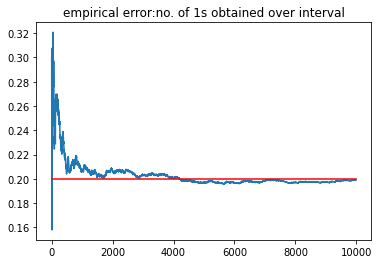

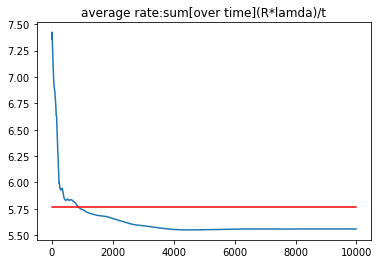

In [16]:
# plots of empirical error and rate
stat = 10
end = 10000
org_rate = dot(org_x,R)
error_plot = 1.0 - np.copy(b)
rate_plot = np.copy(avg_rate)
for i in range(1,len(error_plot)):
    error_plot[i] += (error_plot[i-1]*(i-1))
    error_plot[i] =error_plot[i]/i
plt.plot(error_plot[stat:end])
plt.plot([0,len(error_plot[stat:end])],[tol,tol],'r')
plt.title('empirical error:no. of 1s obtained over interval')
plt.show()
for i in range(1,len(rate_plot)):
    rate_plot[i] += (rate_plot[i-1]*(i-1))
    rate_plot[i] =rate_plot[i]/i
plt.plot(rate_plot[stat:end])
plt.plot([0,len(error_plot[stat:end])],[org_rate,org_rate],'r')
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

In [17]:
# starting and ending rate, error, x values
print(x0.flatten())
print('--------------------------------------------------------------------------')
print(x[end-2].flatten())
print(org_x)
print(error_plot[end-2],tol)
print(rate_plot[end-2],avg_rate[end-2],dot(org_x,R))

[0.44680851 0.         0.46808511 0.         0.         0.
 0.         0.08510638 0.         0.         0.         0.        ]
--------------------------------------------------------------------------
[0.62013273 0.         0.         0.37986727 0.         0.
 0.         0.         0.         0.         0.         0.        ]
[0.         0.         0.         0.44137931 0.         0.
 0.55862069 0.         0.         0.         0.         0.        ]
0.1992398479695941 0.2
5.5586470251426885 5.519991966566576 5.765517241379311


0.23711774648475306


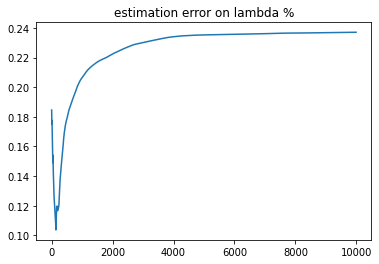

In [18]:
# error plot when compared to optimal x
err = []
for i in range(len(x)):
    err.append(np.sqrt(np.sum(np.square(org_x-x[i].flatten()))/en))
    err[i] += (err[i-1]*(i))
    err[i] = err[i]/(i+1)
print(err[-1])
plt.plot(err[stat:end])
plt.title('estimation error on lambda %')
plt.show()